#### All States-USA Houseprices - Dataset 2 - Corrected - Excercise 1 - Timothy Gregorian

In this analysis, we use a large dataset of housing prices across all states in the United States to identify the main factors that influence property values. The purpose of this dataset is to build a predictive deep learning model that can estimate house prices more accurately due to the higher number of observations compared to the smaller dataset used in the folder "ANN-Regression-Dataset1".

#### Note
Throughout the project, I followed the lecturer’s GitHub code structure and methodology as closely as possible, and only used AI and external sources when no examples were available in the provided GitHub scripts.

#### Link to Dataset 2

https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

#### Information about the Dataset
This USA Housing Market Dataset contains around 2.2 million rows and 12 columns of real-estate related data, which can be used for housing price predictions.

#### Data Description
The dataset contains thousands of housing records from different U.S. states and includes multiple variables that can affect property prices. Some of the key variables are:

1) brokered_by: Real estate agency or broker responsible for the listing.

2) status: Current status of the property.

3) price: Selling price of the house -> in our case the target variable.

4) bed: Number of bedrooms.

5) bath: Number of bathrooms.

6) acre_lot: Lot size in acres.

7) street: Street address of the property.

8) city: City where the house is located.

9) state: State where the house is located.

10) zip_code: Postal code of the property.

11) house_size: Total living area of the house in square feet.

12) prev_sold_date: Date when the property was previously sold.

This dataset provides a comprehensive view of the U.S. housing market, covering both property characteristics and regional information that can affect house prices.

#### Import / Modules

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

#### Loading the dataset
In this step, we prepared the dataset by removing unnecessary columns and dropping rows with missing values in the main features. Since the dataset was too large, we randomly sampled 500,000 rows to include data from all U.S. states. 

In [85]:
df = pd.read_csv("realtor-data.zip.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.00,for_sale,105000.00,3.00,2.00,0.12,1962661.00,Adjuntas,Puerto Rico,601.00,920.00,NaN
1,52707.00,for_sale,80000.00,4.00,2.00,0.08,1902874.00,Adjuntas,Puerto Rico,601.00,1527.00,NaN
2,103379.00,for_sale,67000.00,2.00,1.00,0.15,1404990.00,Juana Diaz,Puerto Rico,795.00,748.00,NaN
3,31239.00,for_sale,145000.00,4.00,2.00,0.10,1947675.00,Ponce,Puerto Rico,731.00,1800.00,NaN
4,34632.00,for_sale,65000.00,6.00,2.00,0.05,331151.00,Mayaguez,Puerto Rico,680.00,NaN,NaN


#### Handle missing values
We have many missing values:

In [86]:
df.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

#### Artificial Intelligence was used in this code cell

In this code cell AI was used to find the optimal code for sampling the same 500.000 data from 2.2 million:

In [87]:
core_cols = ['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street', 'city', 'state', 'zip_code', 'house_size', 'prev_sold_date']
df= df.dropna(subset=core_cols)

print("Shape after removing missing values:", df.shape)

if len(df) >= 500_000:
    df = df.sample(n=500_000, random_state=7)
else:
    print("Error! Dataset has less than 500.000 rows of data.")

print("Shape after sampling:", df.shape)


Shape after removing missing values: (1084909, 12)
Shape after sampling: (500000, 12)


We have no more missing values as well as no duplicates: 

In [88]:
df.isna().sum()

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64

In [89]:
int(df.duplicated().sum())

0

Now we have to see, which support variables are unnecessary for the model:

In [90]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2166124,10236.00,sold,565000.00,4.00,2.00,0.18,1413209.00,Antelope,California,95843.00,1714.00,2021-12-22
1143752,64933.00,for_sale,5179000.00,6.00,7.00,0.31,1314338.00,Denver,Colorado,80246.00,7063.00,2005-09-27
1235659,22415.00,for_sale,375000.00,4.00,3.00,0.19,632364.00,Rio Rancho,New Mexico,87144.00,1984.00,2017-10-03
928402,23236.00,for_sale,284000.00,3.00,2.00,0.36,237644.00,Pea Ridge,Arkansas,72751.00,1883.00,2021-04-02
1194958,66703.00,for_sale,415000.00,4.00,2.00,0.15,968724.00,Phoenix,Arizona,85017.00,1674.00,2018-02-09


In [91]:
columns_to_delete = ["brokered_by", "status", "street", "city", "prev_sold_date"]
df = df.drop(columns=columns_to_delete)
df.head()

,price,bed,bath,acre_lot,state,zip_code,house_size
2166124,565000.00,4.00,2.00,0.18,California,95843.00,1714.00
1143752,5179000.00,6.00,7.00,0.31,Colorado,80246.00,7063.00
1235659,375000.00,4.00,3.00,0.19,New Mexico,87144.00,1984.00
928402,284000.00,3.00,2.00,0.36,Arkansas,72751.00,1883.00
1194958,415000.00,4.00,2.00,0.15,Arizona,85017.00,1674.00


#### Artificial Intelligence was used for this code cell

AI was used for this code cell because the initial approach with Agglomerative Clustering resulted in a MemoryError of around 931 GB RAM, caused by the algorithm attempting to process over 250 million data points.
To overcome this limitation, I replaced the method with MiniBatchKMeans, which is more memory-efficient and suitable for large datasets.
Additionally, I used AI because I could not find any example or reference for this method in the lecturer’s provided GitHub code scripts.

In [92]:
from sklearn.cluster import MiniBatchKMeans

X_zip = df[["zip_code"]].values

kmeans = MiniBatchKMeans(n_clusters=55, random_state=7, batch_size=10000)
df["ZipCodeCluster"] = kmeans.fit_predict(X_zip)

cluster_mean = df.groupby("ZipCodeCluster")["price"].mean()
df["ZipCodeClusterValue"] = df["ZipCodeCluster"].map(cluster_mean)
df = df.drop(columns=["zip_code", "ZipCodeCluster"])

In [93]:
df.head()

,price,bed,bath,acre_lot,state,house_size,ZipCodeClusterValue
2166124,565000.00,4.00,2.00,0.18,California,1714.00,626757.38
1143752,5179000.00,6.00,7.00,0.31,Colorado,7063.00,623101.82
1235659,375000.00,4.00,3.00,0.19,New Mexico,1984.00,413175.23
928402,284000.00,3.00,2.00,0.36,Arkansas,1883.00,298907.56
1194958,415000.00,4.00,2.00,0.15,Arizona,1674.00,546004.49


#### OneHotEncoder for the variable "state"

In [94]:
df = pd.get_dummies(df, columns=["state"], drop_first=False)

Looks better, but now we have to use a LabelEncoder, so that we have only numeric values. Inn this case all the boolean variables will have numerical values of 0 or 1:

In [84]:
len(df)

500000

In [83]:
len(df.columns)

59

In [60]:
df.head()

,price,bed,bath,acre_lot,house_size,ZipCodeClusterValue,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
2166124,565000.0,4.0,2.0,0.18,1714.0,626757.377033,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1143752,5179000.0,6.0,7.0,0.31,7063.0,623101.820529,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1235659,375000.0,4.0,3.0,0.19,1984.0,413175.232199,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
928402,284000.0,3.0,2.0,0.36,1883.0,298907.558848,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1194958,415000.0,4.0,2.0,0.15,1674.0,546004.487166,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
from sklearn.preprocessing import LabelEncoder
variables = [
    'state_Alabama', 'state_Alaska', 
    'state_Arizona', 'state_Arkansas', 
    'state_California', 'state_Colorado', 
    'state_Connecticut', 'state_Delaware', 
    'state_District of Columbia',
    'state_Florida', 'state_Georgia', 
    'state_Hawaii', 'state_Idaho', 
    'state_Illinois', 'state_Indiana', 
    'state_Iowa', 'state_Kansas', 
    'state_Kentucky', 'state_Louisiana', 
    'state_Maine', 'state_Maryland', 
    'state_Massachusetts', 'state_Michigan', 
    'state_Minnesota', 'state_Mississippi', 
    'state_Missouri', 'state_Montana', 
    'state_Nebraska', 'state_Nevada', 
    'state_New Hampshire', 'state_New Jersey', 
    'state_New Mexico', 'state_New York', 
    'state_North Carolina', 
    'state_North Dakota', 
    'state_Ohio', 'state_Oklahoma', 
    'state_Oregon', 'state_Pennsylvania',
    'state_Puerto Rico', 
    'state_Rhode Island', 'state_South Carolina', 
    'state_South Dakota', 'state_Tennessee', 
    'state_Texas', 'state_Utah', 
    'state_Vermont', 'state_Virgin Islands','state_Virginia', 
    'state_Washington', 'state_West Virginia', 
    'state_Wisconsin', 'state_Wyoming'
]
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

After the LabelEncoding, we can now start with the correlation-, chi²- and VIF-Test: 

In [62]:
df.head()

,price,bed,bath,acre_lot,house_size,ZipCodeClusterValue,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
2166124,565000.0,4.0,2.0,0.18,1714.0,626757.377033,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1143752,5179000.0,6.0,7.0,0.31,7063.0,623101.820529,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1235659,375000.0,4.0,3.0,0.19,1984.0,413175.232199,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
928402,284000.0,3.0,2.0,0.36,1883.0,298907.558848,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1194958,415000.0,4.0,2.0,0.15,1674.0,546004.487166,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### X/y -Split

In [63]:
X = df.drop("price", axis=1)

y = df["price"]

#### Inspect the variables - Correlation

According to the correlations table variables like ZipCodeClusterValue, bed and bath correlate the most with the target variable, where as the categorical state variables do not correlate at all:

In [64]:
correlations = df.corr(numeric_only=True)
correlations

,price,bed,bath,acre_lot,house_size,ZipCodeClusterValue,state_Alabama,state_Alaska,state_Arizona,state_Arkansas,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin Islands,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
price,1.000000,0.185151,0.343078,0.000705,0.153680,0.218445,-0.018665,-0.000743,-0.005288,-0.015740,...,-0.009078,-0.033442,0.013060,-0.002043,0.001121,-0.003677,0.022699,-0.015690,-0.020708,-0.000503
bed,0.185151,1.000000,0.672127,0.000791,0.213154,0.021361,-0.002179,0.003109,-0.036409,-0.005078,...,-0.013412,0.011638,0.034415,0.003125,0.009827,0.027780,-0.000857,-0.007900,-0.005381,0.003866
bath,0.343078,0.672127,1.000000,-0.000912,0.282956,0.064159,-0.004558,0.002619,-0.023993,-0.008149,...,-0.000991,0.033629,0.025129,0.000002,0.009708,0.073442,-0.018596,-0.008371,-0.023354,0.001036
acre_lot,0.000705,0.000791,-0.000912,1.000000,0.000025,0.004218,-0.000910,-0.000235,-0.001920,-0.000984,...,-0.001186,-0.003828,-0.000907,-0.000197,-0.000047,-0.002393,-0.002817,-0.000785,-0.001413,-0.000258
house_size,0.153680,0.213154,0.282956,0.000025,1.000000,0.000298,0.000874,0.000873,-0.010999,0.000184,...,0.002187,0.014426,0.013503,0.001919,0.002058,0.018886,-0.000937,-0.001572,-0.001980,0.003819
ZipCodeClusterValue,0.218445,0.021361,0.064159,0.004218,0.000298,1.000000,-0.051725,0.008360,-0.027460,-0.082060,...,-0.059089,-0.147522,0.017707,0.013109,0.001235,-0.055523,0.100751,-0.071780,-0.085277,0.016414
state_Alabama,-0.018665,-0.002179,-0.004558,-0.000910,0.000874,-0.051725,1.000000,-0.001566,-0.020850,-0.008259,...,-0.010114,-0.031115,-0.005818,-0.001989,-0.000378,-0.018111,-0.018874,-0.006103,-0.010492,-0.002251
state_Alaska,-0.000743,0.003109,0.002619,-0.000235,0.000873,0.008360,-0.001566,1.000000,-0.003649,-0.001445,...,-0.001770,-0.005445,-0.001018,-0.000348,-0.000066,-0.003169,-0.003303,-0.001068,-0.001836,-0.000394
state_Arizona,-0.005288,-0.036409,-0.023993,-0.001920,-0.010999,-0.027460,-0.020850,-0.003649,1.000000,-0.019241,...,-0.023565,-0.072491,-0.013555,-0.004635,-0.000882,-0.042195,-0.043973,-0.014218,-0.024443,-0.005245
state_Arkansas,-0.015740,-0.005078,-0.008149,-0.000984,0.000184,-0.082060,-0.008259,-0.001445,-0.019241,1.000000,...,-0.009334,-0.028714,-0.005369,-0.001836,-0.000349,-0.016714,-0.017418,-0.005632,-0.009682,-0.002078


#### Chi²-test
Even though the variable acre_lot does not correlate well with the price variable, it has the highest score in the chi²-test, being a important feature. On the other hand, ZipCodeClusterValue has the highest chi²-score.

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))
best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
4,ZipCodeClusterValue,25519454178.41
2,acre_lot,1053920250.12
3,house_size,210329500.14
1,bath,118189.82
9,state_California,98298.67
17,state_Idaho,93108.39
54,state_Washington,57463.75
20,state_Iowa,41332.01
0,bed,40509.41
40,state_Ohio,38778.50


#### VIF-Test
In the VIF-test we can see that all the variables, except ZipCodeClusterValue, state_California and state_Florida, do not have a high collinearity, meaning that they do not correlate with each other that well:

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

print(vif_data)

                       feature  VIF
0                          bed 1.86
1                         bath 1.96
2                     acre_lot 1.00
3                   house_size 1.09
4          ZipCodeClusterValue 4.19
5                state_Alabama 1.13
6                 state_Alaska 1.01
7                state_Arizona 1.90
8               state_Arkansas 1.08
9             state_California 9.93
10              state_Colorado 1.41
11           state_Connecticut 1.21
12              state_Delaware 1.09
13  state_District of Columbia 1.05
14               state_Florida 3.51
15               state_Georgia 1.63
16                state_Hawaii 1.08
17                 state_Idaho 1.25
18              state_Illinois 1.46
19               state_Indiana 1.05
20                  state_Iowa 1.12
21                state_Kansas 1.06
22              state_Kentucky 1.10
23             state_Louisiana 1.08
24                 state_Maine 1.01
25              state_Maryland 1.61
26         state_Massachuset

#### Train/Test/Validation-Split (70/30)

In [67]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

#### Create the neural network structure
For the model architecture we used Normalization and also Regularization to optimize the model for training.

In [68]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

variable_amount = len(X.columns)

mc = ModelCheckpoint('best_model_all_states.keras', monitor='val_loss', mode='min', save_best_only=True)

callback_list = [mc]

model_2 = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.1)),
        layers.Dropout(0.1),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ]
)

model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 58)             │           232 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         7,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,153 (70.91 KB)

 Trainable params: 18,037 (70.46 KB)

 Non-trainable params: 116 (464.00 B)

#### Training of the Model
We use only 30 epochs, because the modeltraining takes a lot of time:

In [69]:
model_2.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1773739442176.0000 - val_loss: 775532445696.0000
Epoch 2/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1628747071488.0000 - val_loss: 1774970601472.0000
Epoch 3/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1597809360896.0000 - val_loss: 1934580383744.0000
Epoch 4/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1575240859648.0000 - val_loss: 3667469795328.0000
Epoch 5/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1562002063360.0000 - val_loss: 4766469980160.0000
Epoch 6/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1556386152448.0000 - val_loss: 4889573326848.0000
Epoch 7/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1546481958912.0000 - val_loss: 5873055301632.0000
Epoch 8/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1541080219648.0000 - val_loss: 5444814241792.0000
Epoch 9/30
10938/10938 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1529664765952.00

#### Performance and Error Metrics

<Axes: >

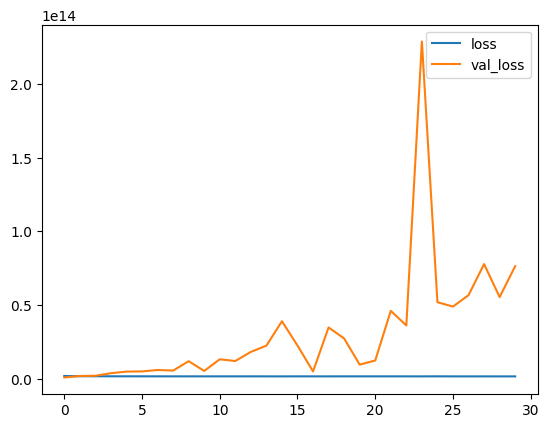

In [70]:
loss_df = pd.DataFrame(model_2.history.history)
loss_df.plot()

The graph shows the training and validation loss after model training.
While the training loss remains stable and low throughout the epochs, the validation loss fluctuates heavily and increases sharply toward the end.
This behavior indicates that the model starts to overfit.

#### Load the best model version

In [71]:
from keras.models import load_model
model_2 = load_model("best_model_all_states.keras")

In [72]:
print("Test data evaluation:")
print(model_2.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model_2.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
633041846272.0

Train data evaluation:
4716292472832.0


The data evaluation indicates that the model may be overfitting, learning the training data more precisely than the test data.

In [73]:
test_predictions = model_2.predict(X_test)

test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df

2344/2344 ━━━━━━━━━━━━━━━━━━━━ 2s 761us/step


,Test True Y,Model Predictions
0,165000.00,290546.72
1,949900.00,1276165.50
2,632000.00,616857.38
3,315000.00,431059.88
4,250000.00,168817.48
...,...,...
74995,275000.00,425063.19
74996,525000.00,586134.38
74997,1795000.00,684114.31
74998,389000.00,353847.62


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

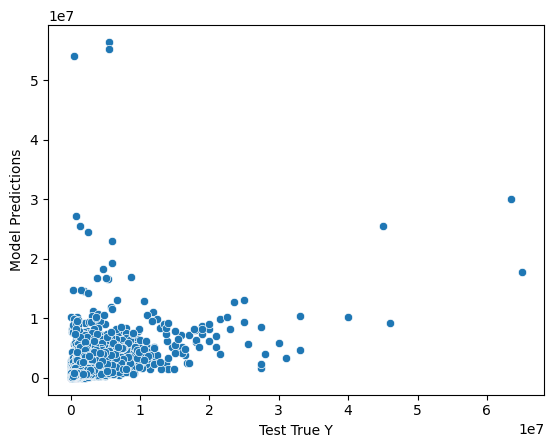

In [74]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [75]:
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
235696.83 $

MSE
633041447278.39 $^2

RMSE:
795639.02 $

R-squared:
0.31

Explained variance score:
0.31


With an R²-score of 0.31 and an explained variance of 0.31, the model explains about 31% of the variation in house prices, showing moderate predictive performance with room for improvement.

C:\Users\Timothy\AppData\Local\Temp\ipykernel_11468\3264322254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_predictions))


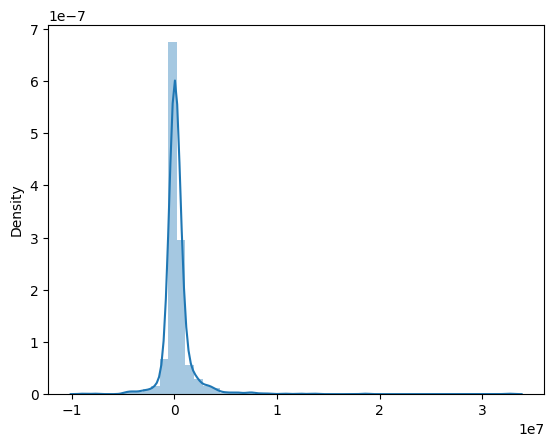

In [76]:
sns.distplot((y_test - test_predictions))
plt.show()
plt.close()

In [77]:
df.columns

Index(['price', 'bed', 'bath', 'acre_lot', 'house_size', 'ZipCodeClusterValue',
       'state_Alabama', 'state_Alaska', 'state_Arizona', 'state_Arkansas',
       'state_California', 'state_Colorado', 'state_Connecticut',
       'state_Delaware', 'state_District of Columbia', 'state_Florida',
       'state_Georgia', 'state_Hawaii', 'state_Idaho', 'state_Illinois',
       'state_Indiana', 'state_Iowa', 'state_Kansas', 'state_Kentucky',
       'state_Louisiana', 'state_Maine', 'state_Maryland',
       'state_Massachusetts', 'state_Michigan', 'state_Minnesota',
       'state_Mississippi', 'state_Missouri', 'state_Montana',
       'state_Nebraska', 'state_Nevada', 'state_New Hampshire',
       'state_New Jersey', 'state_New Mexico', 'state_New York',
       'state_North Carolina', 'state_North Dakota', 'state_Ohio',
       'state_Oklahoma', 'state_Oregon', 'state_Pennsylvania',
       'state_Puerto Rico', 'state_Rhode Island', 'state_South Carolina',
       'state_South Dakota', 'state_Tenn

#### Trying the model in practice with new imaginary house

In [78]:
tester_row = {
    "bed": 4,
    "bath": 3,
    "acre_lot": 0.14,
    "house_size": 3054.0,
    "ZipCodeClusterValue": 154475,

    # states
    'state_Alabama': 0, 
    'state_Alaska': 0,
    'state_Arizona': 0,
    'state_Arkansas': 0,
    'state_California': 0,
    'state_Colorado': 0,
    'state_Connecticut': 0,
    'state_Delaware': 0,
    'state_District of Columbia': 0,
    'state_Florida': 0,
    'state_Georgia': 0,
    'state_Hawaii': 0,
    'state_Idaho': 0,
    'state_Illinois': 0,
    'state_Indiana': 0,
    'state_Iowa': 0,
    'state_Kansas': 0,
    'state_Kentucky': 0,
    'state_Louisiana': 0,
    'state_Maine': 0,
    'state_Maryland': 0,
    'state_Massachusetts': 0,
    'state_Michigan': 0,
    'state_Minnesota': 0,
    'state_Mississippi': 0,
    'state_Missouri': 0,
    'state_Montana': 0,
    'state_Nebraska': 0,
    'state_Nevada': 0,
    'state_New Hampshire': 0,
    'state_New Jersey': 0,
    'state_New Mexico': 0,
    'state_New York': 0,
    'state_North Carolina': 0,
    'state_North Dakota': 0,
    'state_Ohio': 0,
    'state_Oklahoma': 0,
    'state_Oregon': 0,
    'state_Pennsylvania': 0,
    'state_Puerto Rico': 0,
    'state_Rhode Island': 0,
    'state_South Carolina': 0,
    'state_South Dakota': 0, 
    'state_Tennessee': 0,
    'state_Texas': 1,
    'state_Utah': 0,
    'state_Vermont': 0,
    'state_Virgin Islands': 0,
    'state_Virginia': 0,
    'state_Washington': 0,
    'state_West Virginia': 0,
    'state_Wisconsin': 0,
    'state_Wyoming': 0
}

tester_row = pd.DataFrame([tester_row])

In [79]:
result = model_2.predict(tester_row)[0]

print()
print(f"Estimated house price:")
print(f"$ {round(float(result[0]), 2)}")
print("----------------")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Estimated house price:
$ 396386.34
----------------


#### Conclusion
In this project, the model faced limitations due to the large dataset size, which caused a MemoryError when applying Agglomerative Clustering to the zip_code variable.
To overcome this, I used MiniBatchKMeans, a more memory-efficient clustering method, allowing me to transform zip_code.
The resulting model achieved moderate performance with an R²-score of 0.31, showing that the optimized zip_code variable contributed to improved predictions.

Throughout the project, I followed the lecturer’s GitHub code structure as closely as possible and only used AI and external sources when no examples for these specific methods were available in the provided GitHub scripts.